In [50]:
# imports
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import random
from numpy import linalg as LA

import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/home/kapi/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['dist', 'size', 'test', 'load', 'hist', 'fft', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [51]:
def dist(img1, img2):
    res = 0
    for i in range(len(img1)):
        res += abs(int(img1[i]) - int(img2[i]))
    return res;

In [52]:
#initialization
def load():
    class_count = 40
    image_count = 10
    imgs = []
    for i in range(class_count):
        imgs.append([])
        for j in range(image_count):
            address = "data/s" + str(i+1) + "/" + str(j+1) + ".pgm"
            imgs[i].append(mpimg.imread(address))
    return imgs

In [53]:
#set test, train

def test_train(imgs, count):
    train = []
    test = []
    for i in imgs:
        train.append(i[:count])
        test.append(i[count:])
    return test, train

In [54]:
def scale(img, mult):
    res = []
    h = len(img)
    w = len(img[0])
    h_count = int(h/mult)
    w_count = int(w/mult)
    for i in range(h_count):
        for j in range (int(w_count)):
            res.append(0)
            value = 0
            for q in range(mult):
                for p in range(mult):
                    value += img[i*mult+q][j*mult+p];
            value = value / mult*mult;
            res.append(value)
    
    for i in range(w_count*h_count):
        res[i] = res[i]/mult/mult
        
    return res

In [55]:
def random_list(count,img):
    h = len(img)
    w = len(img[0])
    res = []
    for i in range(count):
        r = int(random.random()*(h*w-1))
        elem = []
        elem.append(int(r/w))
        elem.append(r%w)
        res.append(elem)
    return res

In [56]:
def random_img(img, rand_list):
    res = []
    for i in rand_list:
        res.append(img[i[0]][i[1]])
    return res

In [57]:
def fft(img, size):
    size2 = [5,5]
    res = []
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    for i in range(int(len(fshift)/2-size[0]), int(len(fshift)/2+size[0])):
        for j in range(int(len(fshift[0])/2-size[1]), int(len(fshift[0])/2+size[1])):
            res.append(fshift[i][j])
    return res;

In [58]:
def dist_complex(img1, img2):
    res = 0
    for i in range(len(img1)):
        res += abs(img1[i] - img2[i])
    return res;

In [59]:
def hist(img, count):
    res = []
    for i in range(count):
        res.append(0)
    for i in img:
        for j in i:
            res[int((j/255)*count)] += 1
    return res;

In [60]:
def grad(img, W, S):
    res = []
    for i in range(S,int((len(img)-W)/S)):
        value = 0
        for j in range(W*len(img[0])):
            id_h = int(i*S+j/(len(img[0])))
            id_w = int(j%(len(img[0])))
            value += abs(img[id_h][id_w] - img[id_h-S][id_w])
        res.append(value)
    return res

In [61]:
def vote(result, class_count):
    voted = []
    for i in range (len(result[0])):
        value = [0]*class_count
        for j in result:
            value[j[i]] += 1
        max_id = 0
        max_value = value[0]
        for i in range(len(value)):
            if (value[i] > value[max_id]):
                max_id = i
                max_value = value[i]
        voted.append(max_id)
    return voted

In [147]:
def fr(test, train):
    res = 0
    res_list = []
    for i in range(len(test)):
#         res_list.append([])
        for j in range(len(test[0])):
            i_id = 0
            image_m = test[i][j]
            i_dist_min = dist(image_m, train[0][0])
            for q in range(len(train)):
                for p in range(len(train[0])):
                    i_dist = dist(image_m, train[q][p])
                    if (i_dist < i_dist_min):
                        i_dist_min = i_dist
                        i_id = q
            if (i_id == i):
                res += 1
            res_list.append(i_id)
    print(res/(10-count_to_load)/40)
    return res_list
            

In [148]:
imgs = load()
count_to_load = 5
class_count = 40
test, train = test_train(imgs, count_to_load)
result = []
for i in range(10):
    result.append([])
    for j in range(5):
        result[i].append([])
        
# result = [[[]]*5]*9
print(result)

[[[], [], [], [], []], [[], [], [], [], []], [[], [], [], [], []], [[], [], [], [], []], [[], [], [], [], []], [[], [], [], [], []], [[], [], [], [], []], [[], [], [], [], []], [[], [], [], [], []], [[], [], [], [], []]]


In [149]:
imgs_scaled = []
image_count = 10
class_count = 40
mult = 4
for i in range(class_count):
    imgs_scaled.append([])
    for j in range(image_count):
#         print(i,j)
        imgs_scaled[i].append(scale(imgs[i][j], mult))

In [94]:
imgs_random = []
image_count = 10
class_count = 40
count = 800
rand_list = random_list(count, imgs[0][0])
for i in range(class_count):
    imgs_random.append([])
    for j in range(image_count):
        imgs_random[i].append(random_img(imgs[i][j], rand_list))

In [96]:
imgs_fft = []
image_count = 10
class_count = 40
size = [5,5]
for i in range(class_count):
    imgs_fft.append([])
    for j in range(image_count):
        imgs_fft[i].append(fft(imgs[i][j], size))

In [163]:
imgs_hist = []
count = 32
for i in range(class_count):
    imgs_hist.append([])
    for j in range(image_count):
        imgs_hist[i].append(hist(imgs[i][j], count))

In [100]:
imgs_grad = []
W = 10
S = 2
for i in range(class_count):
    imgs_grad.append([])
    for j in range(image_count):
        imgs_grad[i].append(grad(imgs[i][j], W, S))

/home/kapi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  


In [167]:
mult = 8
test_count = 10
for i in range(1,test_count):
    count_to_load = i
    class_count = 40
    test, train = test_train(imgs_scaled, count_to_load)
    result[i-1][0] = (fr(test, train))

0.6305555555555555
0.740625
0.7714285714285715
0.825
0.9
0.96875
0.9583333333333334
0.975
0.95


In [168]:
print(result[0][0])

[0, 0, 11, 17, 0, 0, 0, 17, 16, 1, 1, 1, 1, 1, 1, 1, 26, 1, 2, 2, 4, 4, 22, 37, 37, 2, 2, 19, 3, 17, 17, 22, 22, 3, 3, 17, 4, 4, 4, 17, 4, 4, 24, 24, 22, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 37, 37, 22, 8, 39, 9, 9, 37, 9, 23, 23, 9, 9, 7, 10, 10, 10, 10, 10, 10, 10, 10, 10, 2, 12, 2, 8, 11, 2, 11, 11, 11, 12, 3, 3, 12, 17, 37, 12, 29, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 29, 14, 14, 29, 14, 29, 14, 29, 29, 23, 0, 6, 6, 15, 0, 37, 23, 23, 16, 24, 24, 16, 16, 16, 23, 16, 16, 17, 3, 17, 22, 22, 17, 22, 17, 22, 18, 18, 14, 14, 18, 18, 14, 1, 18, 19, 19, 19, 16, 19, 29, 29, 11, 19, 20, 20, 20, 20, 20, 20, 30, 20, 30, 21, 21, 21, 21, 21, 21, 21, 21, 21, 17, 8, 37, 8, 37, 22, 17, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 4, 4, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 36, 25, 39, 26, 26, 26, 26, 26, 26, 26, 26, 26, 25, 27, 25, 25, 27, 25, 36, 25, 25, 28, 28, 28, 37, 29, 28, 37, 28, 28, 29, 29, 29, 4, 29, 29, 29, 29, 29, 2

In [169]:
# count_to_load = 1
# test, train = test_train(imgs_scaled, count_to_load)
# print(fr(test, train))

In [170]:
for i in range(1,test_count):
    count_to_load = i
    class_count = 40
    test, train = test_train(imgs_random, count_to_load)
    result[i-1][1] = (fr(test, train))

0.736111111111111
0.846875
0.8678571428571429
0.9125
0.9349999999999999
0.96875
0.9666666666666666
0.9625
0.925


In [171]:
for i in range(1,test_count):
    count_to_load = i
    class_count = 40
    test, train = test_train(imgs_fft, count_to_load)
    result[i-1][2] = (fr(test, train))

/home/kapi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


0.675
0.78125
0.8428571428571429
0.8791666666666667
0.8949999999999999
0.94375
0.95
0.9375
0.925


In [172]:
for i in range(1,test_count):
    count_to_load = i
    class_count = 40
    test, train = test_train(imgs_hist, count_to_load)
    result[i-1][3] = (fr(test, train))

0.6083333333333333
0.68125
0.6928571428571428
0.7916666666666667
0.905
0.98125
0.9833333333333334
0.975
1.0


In [173]:
for i in range(1,test_count):
    count_to_load = i
    class_count = 40
    test, train = test_train(imgs_grad, count_to_load)
    result[i-1][4] = (fr(test, train))

0.6305555555555555
0.690625
0.7107142857142856
0.7375
0.78
0.85625
0.8833333333333334
0.875
0.825


In [174]:
# res = result[0][0]
# print(res)
# voted = vote(res, class_count)
# right = []
# count_to_load = 1
# for i in range(40):
#     for j in range(10-count_to_load):
#         right.append(i)
# print(right)
# ans = 0
# t = voted
# res = 0
# for i in range(len(t)):
#     if (t[i] == right[i]):
#         ans += 1
# print(ans)
# print(len(t))

In [175]:
print(len(result[0][0]))

360


In [257]:
graph_data = [[]]
picture_data = [[],[],[],[],[],[]]

In [258]:
# res = result[0][0]
for c in range(1,test_count):
    res = result[c-1]
# print(res)
    voted = vote(res, class_count)
    right = []
    count_to_load = c
    for i in range(40):
        for j in range(10-count_to_load):
            right.append(i)
#     print(right)
    ans = 0
    t = voted
    res = 0
    for i in range(len(t)):
        if (t[i] == right[i]):
            ans += 1
    print(ans/len(t))
    graph_data[0].append(ans/len(t))
    if (c == 6):
        picture_data[0]=voted
#         print(1)
#     print(len(t))

0.75
0.878125
0.8964285714285715
0.9375
0.96
0.9875
0.9833333333333333
0.975
0.95


In [259]:
# graph_data = []

In [260]:

for method_num in range(5):
    graph_data.append([])    
    for c in range(1,test_count):
        res = [result[c-1][method_num]]
# print(res)
        voted = vote(res, class_count)
        right = []
        count_to_load = c
        for i in range(40):
            for j in range(10-count_to_load):
                right.append(i)
#     print(right)
        ans = 0
        t = voted
        res = 0
        for i in range(len(t)):
            if (t[i] == right[i]):
                ans += 1
        print(method_num, c, ans/len(t))
        graph_data[method_num+1].append(ans/len(t))
        
        if (c == 6):
            picture_data[method_num+1]=voted

0 1 0.6305555555555555
0 2 0.740625
0 3 0.7714285714285715
0 4 0.825
0 5 0.9
0 6 0.96875
0 7 0.9583333333333334
0 8 0.975
0 9 0.95
1 1 0.7361111111111112
1 2 0.846875
1 3 0.8678571428571429
1 4 0.9125
1 5 0.935
1 6 0.96875
1 7 0.9666666666666667
1 8 0.9625
1 9 0.925
2 1 0.675
2 2 0.78125
2 3 0.8428571428571429
2 4 0.8791666666666667
2 5 0.895
2 6 0.94375
2 7 0.95
2 8 0.9375
2 9 0.925
3 1 0.6083333333333333
3 2 0.68125
3 3 0.6928571428571428
3 4 0.7916666666666666
3 5 0.905
3 6 0.98125
3 7 0.9833333333333333
3 8 0.975
3 9 1.0
4 1 0.6305555555555555
4 2 0.690625
4 3 0.7107142857142857
4 4 0.7375
4 5 0.78
4 6 0.85625
4 7 0.8833333333333333
4 8 0.875
4 9 0.825


In [261]:
graph_data


[[0.75,
  0.878125,
  0.8964285714285715,
  0.9375,
  0.96,
  0.9875,
  0.9833333333333333,
  0.975,
  0.95],
 [0.6305555555555555,
  0.740625,
  0.7714285714285715,
  0.825,
  0.9,
  0.96875,
  0.9583333333333334,
  0.975,
  0.95],
 [0.7361111111111112,
  0.846875,
  0.8678571428571429,
  0.9125,
  0.935,
  0.96875,
  0.9666666666666667,
  0.9625,
  0.925],
 [0.675,
  0.78125,
  0.8428571428571429,
  0.8791666666666667,
  0.895,
  0.94375,
  0.95,
  0.9375,
  0.925],
 [0.6083333333333333,
  0.68125,
  0.6928571428571428,
  0.7916666666666666,
  0.905,
  0.98125,
  0.9833333333333333,
  0.975,
  1.0],
 [0.6305555555555555,
  0.690625,
  0.7107142857142857,
  0.7375,
  0.78,
  0.85625,
  0.8833333333333333,
  0.875,
  0.825]]

In [262]:
# from matplotlib.pyplot import figure
# figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')

In [263]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
rcParams['figure.dpi'] = 200

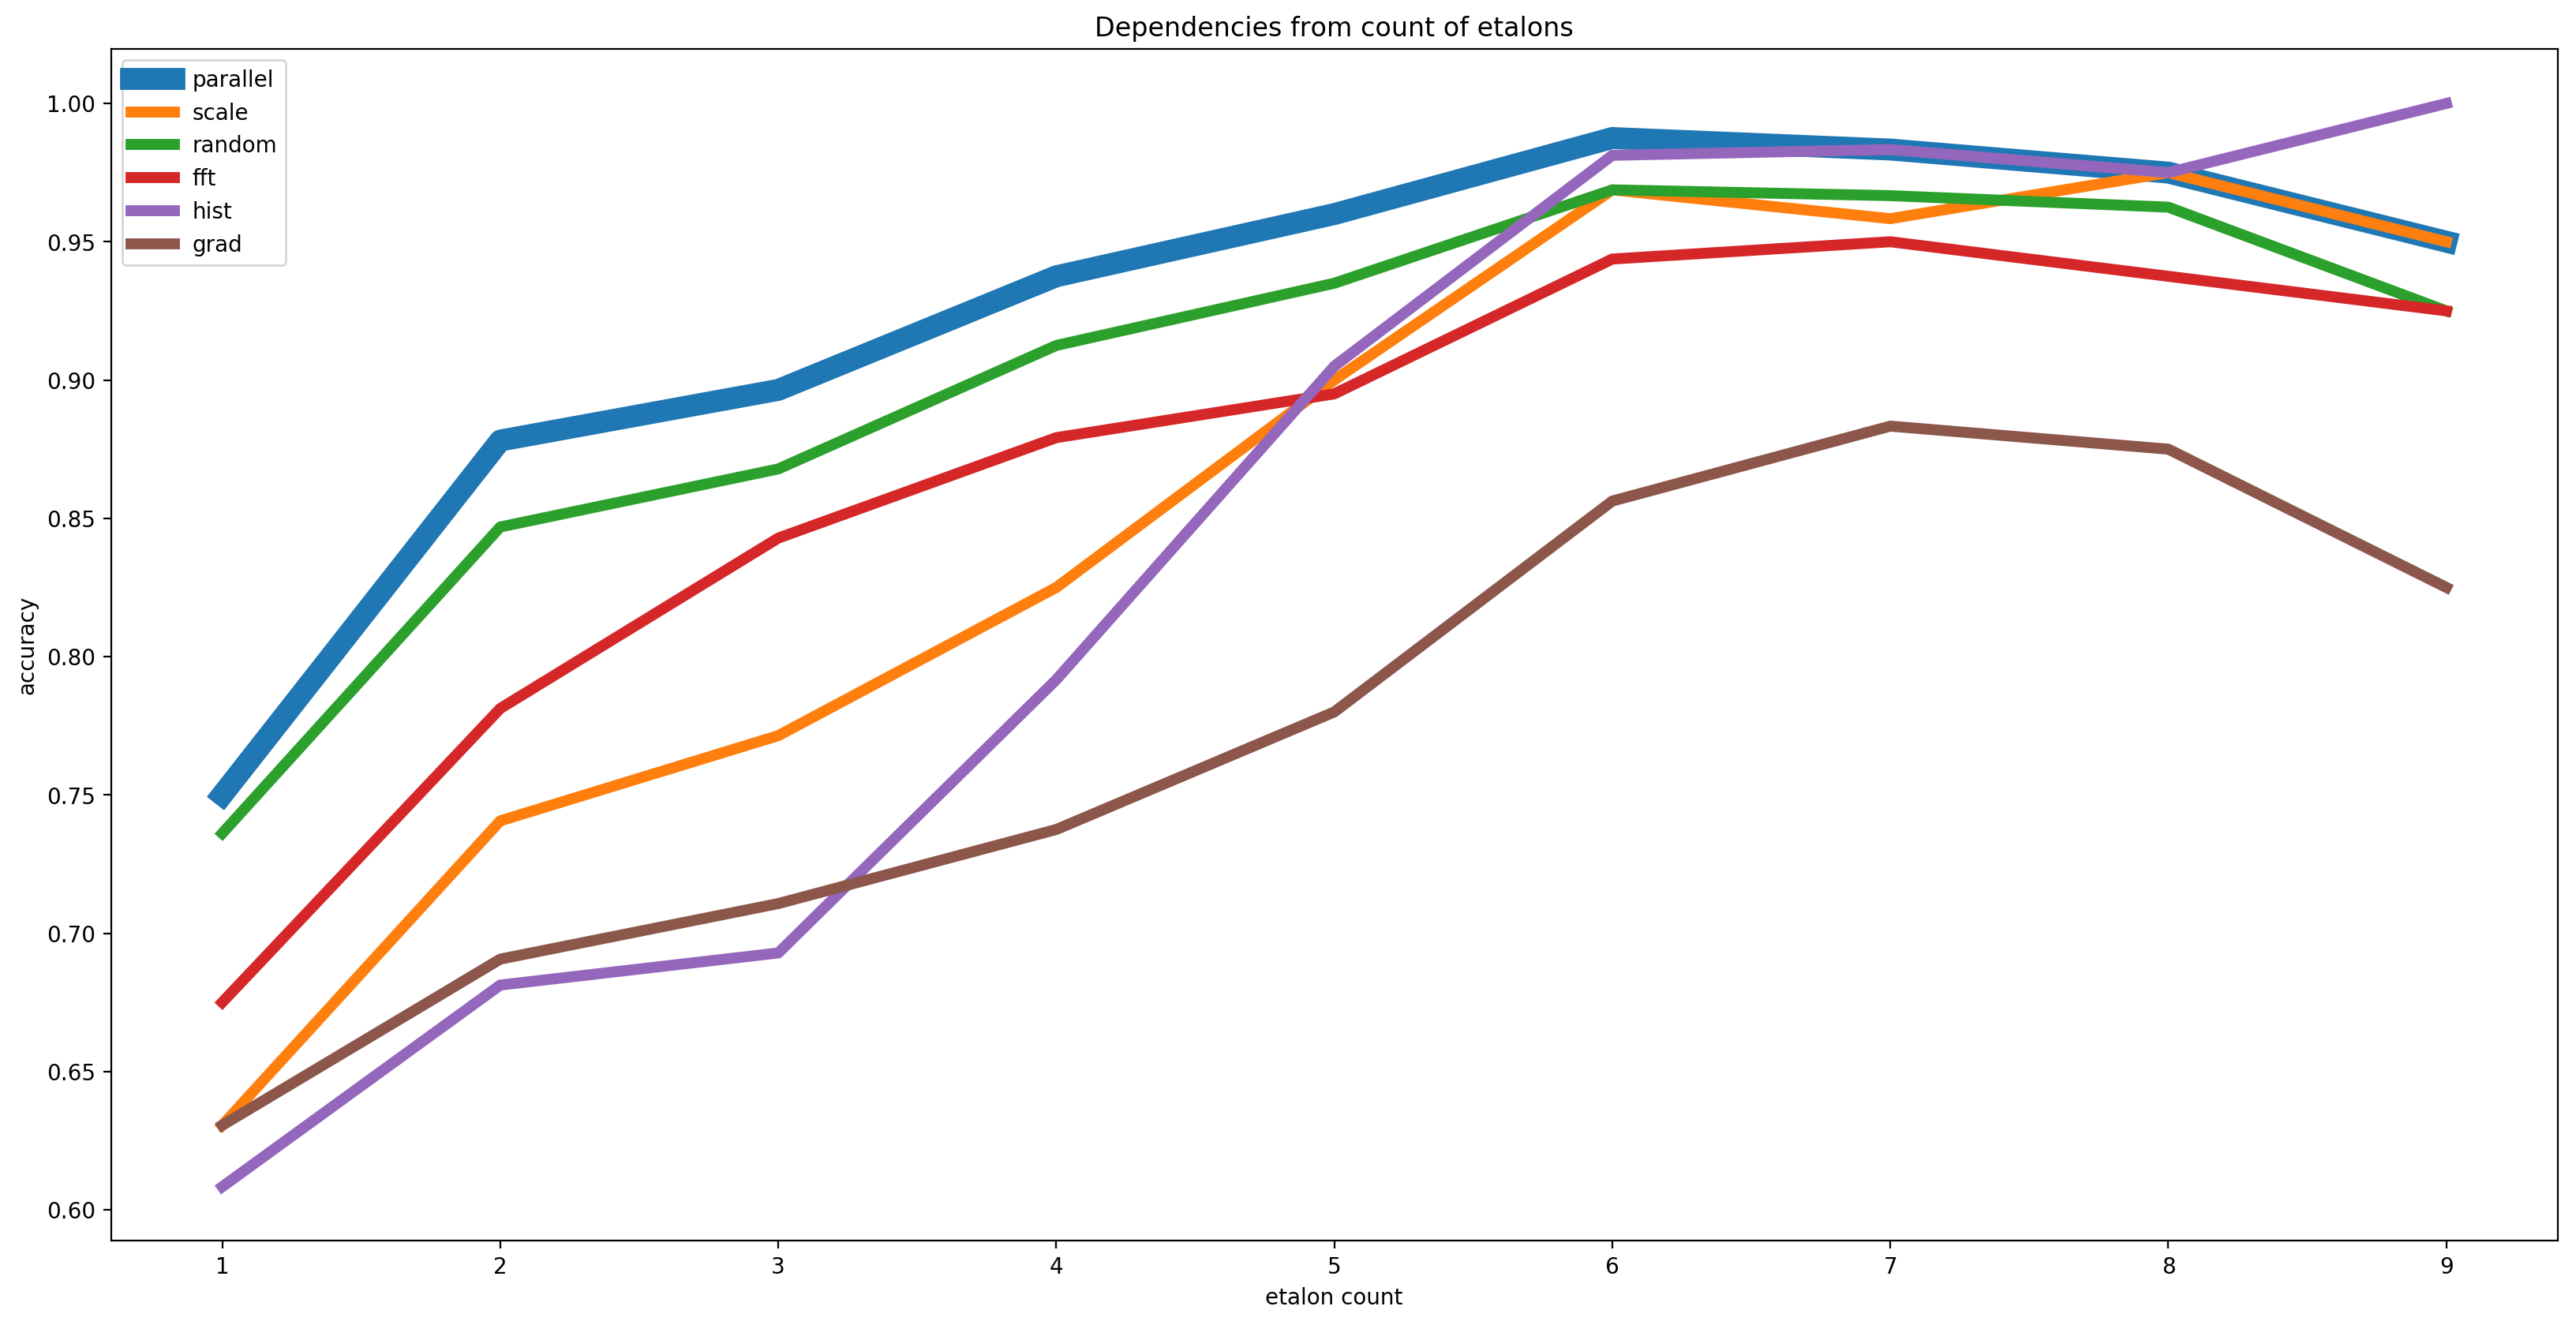

In [266]:
x = [1,2,3,4,5,6,7,8,9]
plt.title('Dependencies from count of etalons')   # заголовок
plt.xlabel('etalon count')   # подпись оси OX
plt.ylabel('accuracy')   # подпись оси OY
plt.plot(x,graph_data[0], label = "parallel", linewidth=10.0)
plt.plot(x,graph_data[1], label = "scale", linewidth=5.0)
plt.plot(x,graph_data[2], label = "random", linewidth=5.0)
plt.plot(x,graph_data[3], label = "fft", linewidth=5.0)
plt.plot(x,graph_data[4], label = "hist", linewidth=5.0)
plt.plot(x,graph_data[5], label = "grad", linewidth=5.0)

plt.legend()   # легенда

In [267]:
# print(picture_data)
for 

[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 39, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 7, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 32, 32, 32, 32, 33, 33, 33, 33, 34, 34, 34, 34, 35, 35, 35, 35, 36, 36, 36, 36, 37, 37, 37, 37, 38, 38, 38, 38, 39, 39, 39, 39], [0, 23, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 39, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 7, 10, 10, 10, 10, 11, 11, 11, 11, 3, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 26, 27